### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline

### Đọc dữ liệu các bài posts, comments, reactors, sharers

In [2]:
post_df = pd.read_csv('data/vebay69/clean/posts_full.csv')
comment_df = pd.read_csv('data/vebay69/clean/comments_full.csv')
reactor_df = pd.read_csv('data/vebay69/clean/reactors_full.csv')
sharer_df = pd.read_csv('data/vebay69/clean/sharers_full.csv')

### Tổng quan về dữ liệu 

In [3]:
print('Posts: ', post_df.shape)
print('Comments: ', comment_df.shape)
print('Reactors: ', reactor_df.shape)
print('Shares: ', sharer_df.shape)

Posts:  (911, 37)
Comments:  (20986, 10)
Reactors:  (10807, 5)
Shares:  (18942, 4)


# Phân tích các bài posts

In [4]:
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        911 non-null    int64  
 1   post_text                      911 non-null    object 
 2   shared_text                    24 non-null     object 
 3   time                           911 non-null    object 
 4   image                          884 non-null    object 
 5   image_lowquality               911 non-null    object 
 6   images                         910 non-null    object 
 7   images_description             910 non-null    object 
 8   images_lowquality              911 non-null    object 
 9   images_lowquality_description  911 non-null    object 
 10  likes                          911 non-null    int64  
 11  comments                       911 non-null    int64  
 12  shares                         911 non-null    int

### Dữ liệu các bài post được lấy trong khoảng thời gian nào ?

In [5]:
post_df['time'].min(), post_df['time'].max()

('2022-05-06 07:37:28', '2023-11-22 03:43:11')

### Số admin của page và số bài post tương ứng

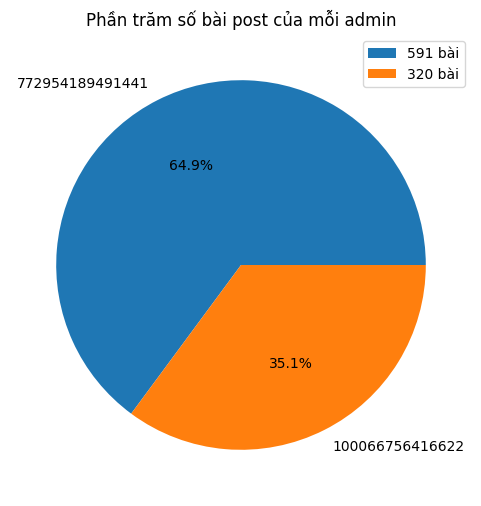

In [6]:
# post_df['user_id'].value_counts().plot(kind='pie', figsize=(6, 6), title='Phần trăm số bài post của mỗi admin', autopct='%1.1f%%');
value_counts = post_df['user_id'].value_counts()
value_counts.plot(kind='pie', figsize=(6, 6), title='Phần trăm số bài post của mỗi admin', autopct='%1.1f%%');
plt.ylabel('');
labels = [str(value) + " bài" for value in value_counts.values]
plt.legend(labels=labels, loc='upper right');

### Đâu là bài viết có lượt tương tác lớn nhất trong bộ dữ liệu ?

Top 5 post có nhiều lượt reaction nhất

In [7]:
top_5_max_reaction = post_df.nlargest(5, 'reaction_count')
top_5_max_reaction[['post_id', 'post_text', 'reaction_count', 'time']]

,post_id,post_text,reaction_count,time
711,5663428510443960,Ai chắc cũng đã từng\n,37754,2022-09-26 04:48:56
622,5854513741335435,Na Ế trải lòng\n,26723,2022-12-01 10:09:47
644,5808693772584099,Tin chuẩn chưa bro\n,26325,2022-11-15 03:55:23
662,5775707419216068,Nổ stk đê\n,24967,2022-11-03 10:30:35
423,6291401437646661,Nhưng mấy anh cứ giựt giựt ấy\n,24928,2023-04-21 03:34:58


In [8]:
top_5_min_reaction = post_df.nsmallest(5, 'reaction_count')
top_5_min_reaction[['post_id', 'post_text', 'reaction_count', 'time']]

,post_id,post_text,reaction_count,time
466,6238158042971001,Hy vọng mèo 2023 là mèo thần tài 😁,4,2023-04-03 06:00:02
465,6238625046257634,Này để chọc mấy người 1m8 à? 😁,7,2023-04-03 10:30:03
517,6150474095072730,Superhero này siuuuu :v,8,2023-03-05 10:30:03
470,6233068110146661,Ôi tuổi thơ 😂,10,2023-04-01 10:30:01
471,6232543603532445,Sao lại mang toàn thú cưng ra minh họa thế này? 😆,12,2023-04-01 06:00:01


In [9]:
col_type_int = ['reaction_count', 'comments', 'shares', 'like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']

In [10]:
post_df[col_type_int].describe()

,reaction_count,comments,shares,like,love,haha,wow,care,sad,angry
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,5038.362239,280.329308,72.452250,3436.576290,19.234907,1510.127333,6.059276,5.110867,60.677278,0.576290
std,4479.467966,591.878161,962.648469,2852.364827,150.504506,1973.483057,45.675694,16.067981,229.619291,3.614447
min,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1976.000000,46.000000,7.000000,1310.500000,2.000000,327.500000,1.000000,1.000000,4.000000,0.000000
50%,3668.000000,99.000000,16.000000,2623.000000,5.000000,764.000000,3.000000,3.000000,14.000000,0.000000
75%,6645.000000,260.500000,40.000000,4626.000000,10.000000,1763.500000,6.000000,5.000000,45.000000,0.000000
max,37754.000000,7500.000000,29000.000000,21311.000000,4205.000000,14508.000000,1354.000000,333.000000,5041.000000,86.000000


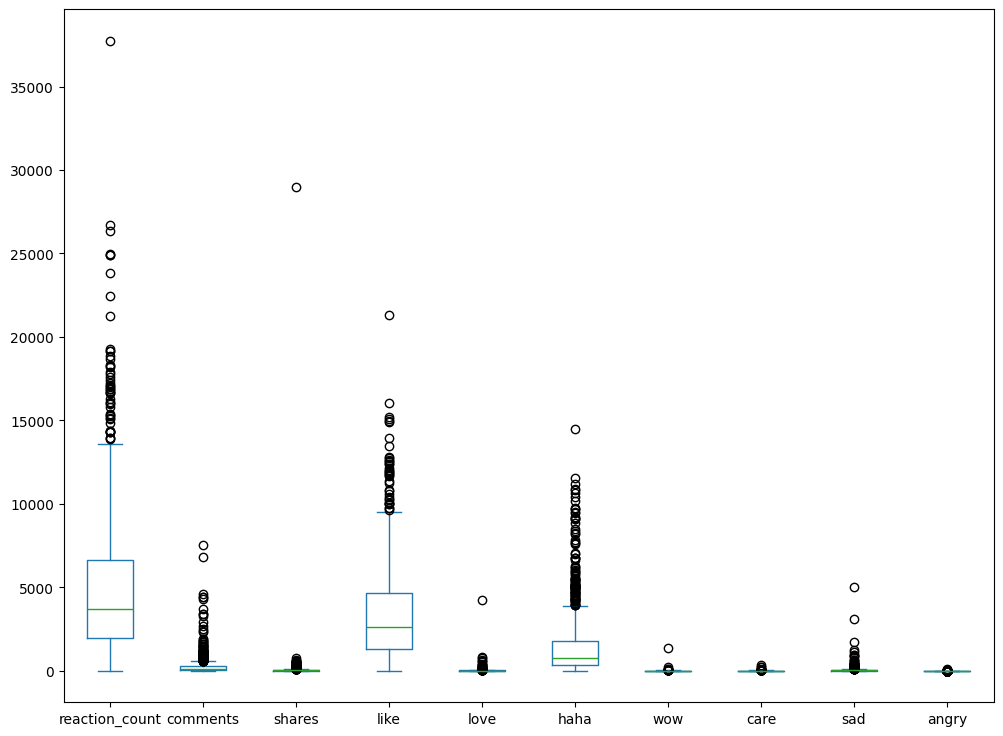

In [11]:
post_df[col_type_int].plot(kind='box', figsize=(12, 9));

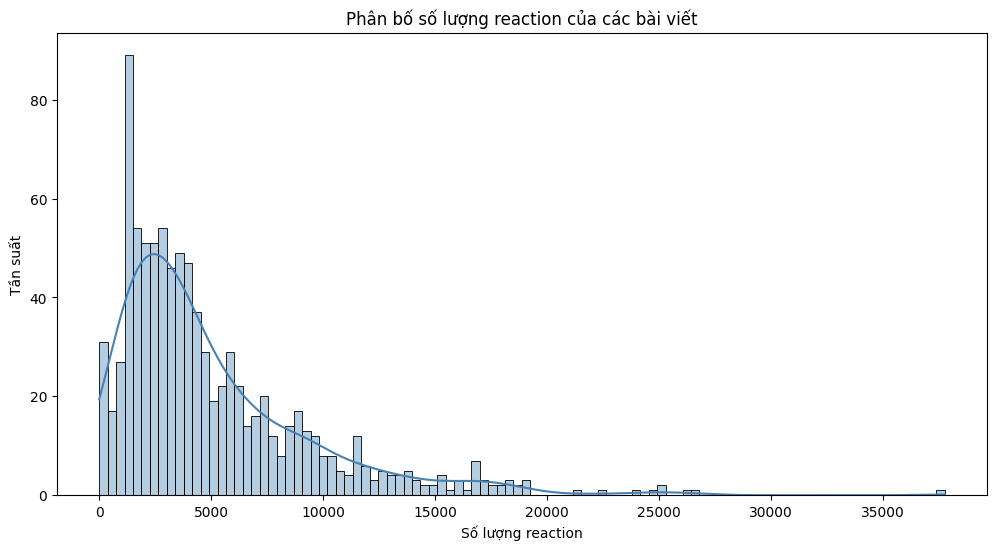

In [12]:
plt.figure(figsize=(12, 6));
sns.histplot(post_df['reaction_count'], bins=100, color='steelblue', edgecolor='black', kde=True, alpha=0.4);
plt.xlabel('Số lượng reaction')
plt.ylabel('Tần suất')
plt.title('Phân bố số lượng reaction của các bài viết');

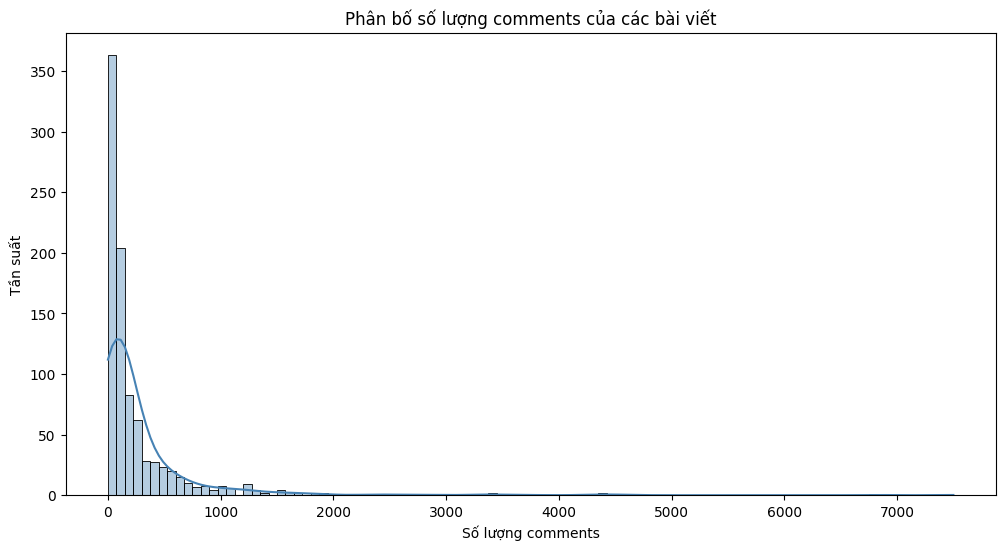

In [13]:
plt.figure(figsize=(12, 6));
sns.histplot(post_df['comments'], bins=100, color='steelblue', edgecolor='black', kde=True, alpha=0.4);
plt.xlabel('Số lượng comments')
plt.ylabel('Tần suất')
plt.title('Phân bố số lượng comments của các bài viết');

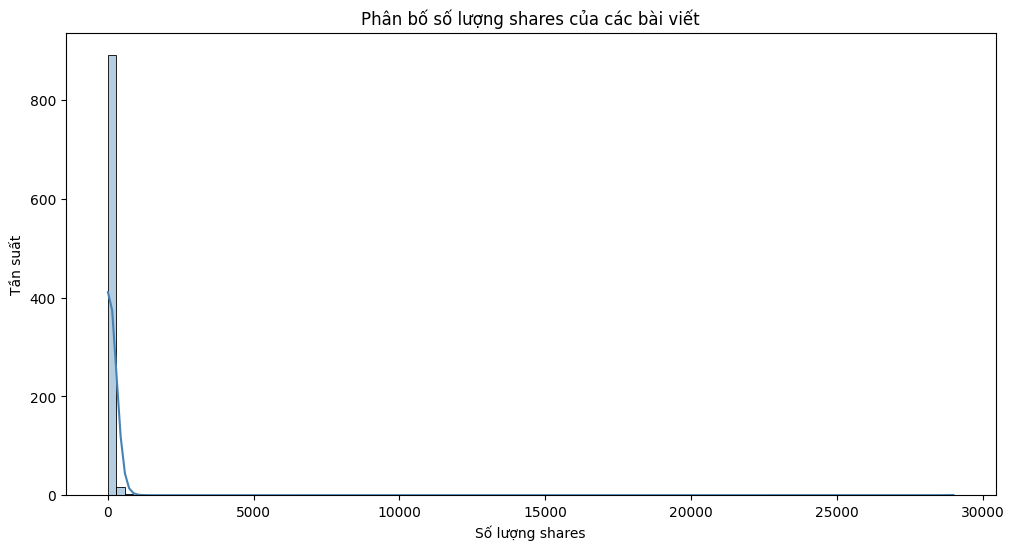

In [14]:
plt.figure(figsize=(12, 6));
sns.histplot(post_df['shares'], bins=100, color='steelblue', edgecolor='black', kde=True, alpha=0.4);
plt.xlabel('Số lượng shares')
plt.ylabel('Tần suất')
plt.title('Phân bố số lượng shares của các bài viết');

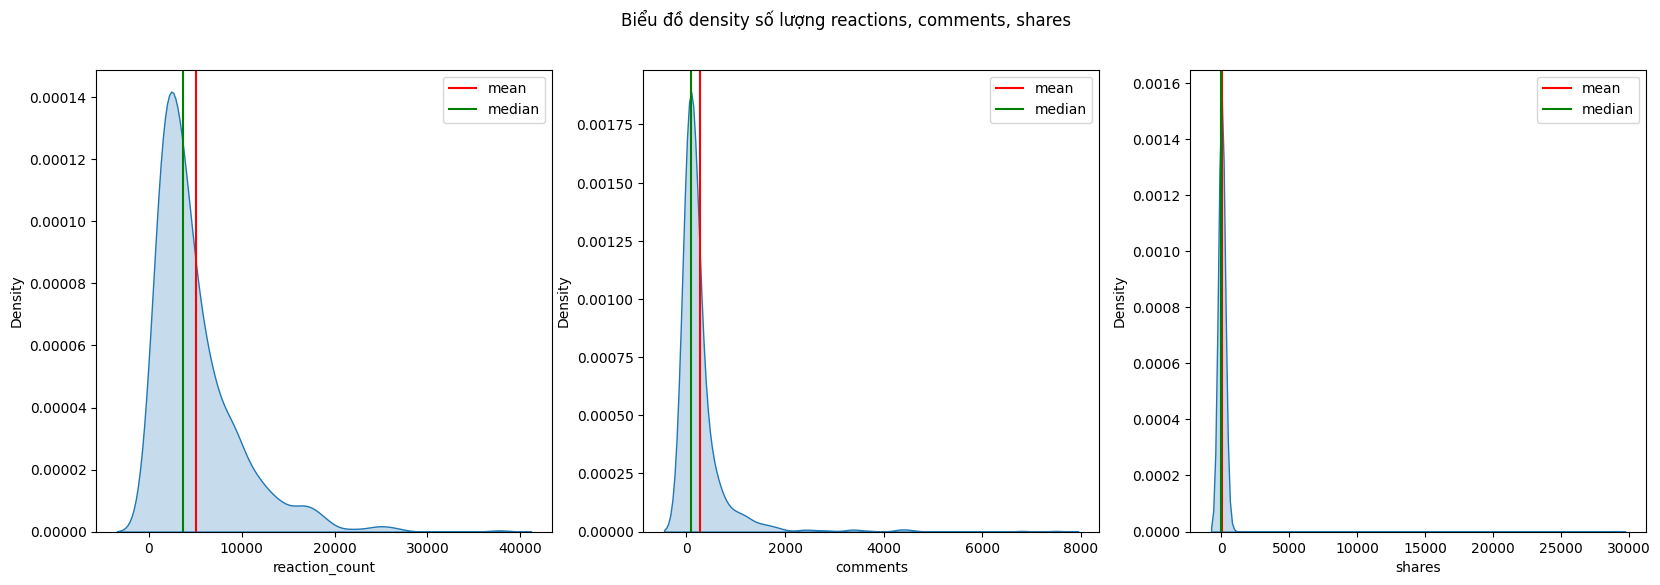

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
cols = ['reaction_count', 'comments', 'shares']
fig.suptitle('Biểu đồ density số lượng reactions, comments, shares')
for index, value in enumerate(cols):
    sns.kdeplot(data=post_df[value], fill=True, ax=axes[index])
    axes[index].axvline(post_df[value].mean(), color='red', label='mean')
    axes[index].axvline(post_df[value].median(), color='green', label='median')
    axes[index].set_xlabel(value)
    axes[index].legend()

### Thống kê bài đăng theo ngày trong tuần

In [16]:
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
post_df['time'] = pd.to_datetime(post_df['time'])
post_df['weekday'] = post_df['time'].dt.weekday
posts_per_day_of_week = post_df['weekday'].value_counts().sort_index().rename(index=weekdays)
posts_per_day_of_week

weekday
Monday       153
Tuesday      133
Wednesday    151
Thursday     153
Friday       140
Saturday      96
Sunday        85
Name: count, dtype: int64

Số lượng posts theo ngày trong tuần

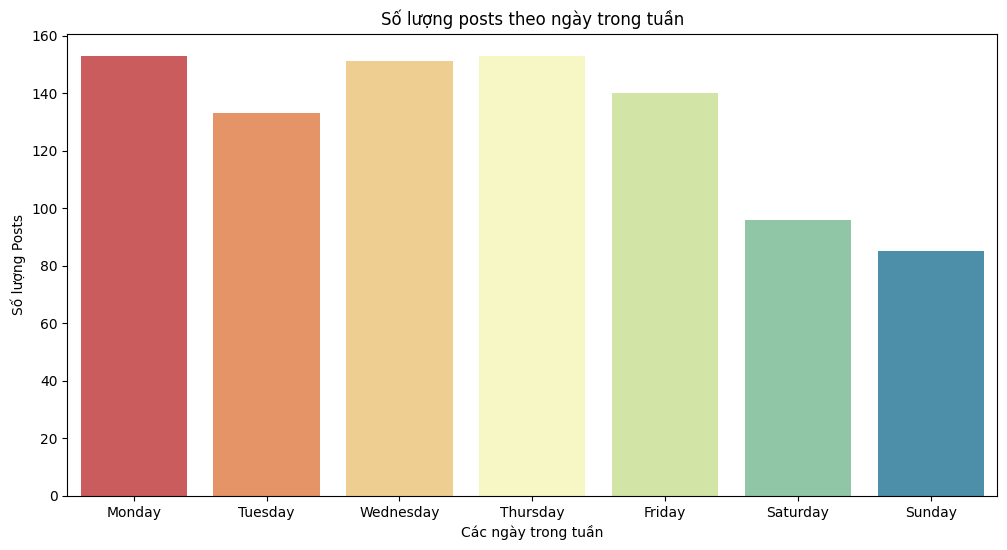

In [17]:
plt.figure(figsize=(12, 6));
# posts_per_day_of_week.plot(kind='bar', figsize=(15, 5), title='Số lượng posts theo ngày trong tuần')
sns.barplot(x=posts_per_day_of_week.index, y=posts_per_day_of_week.values, hue=posts_per_day_of_week.index, palette='Spectral')
plt.title('Số lượng posts theo ngày trong tuần')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Số lượng Posts');

In [18]:
avg_reaction_per_day_of_week = post_df.groupby('weekday')[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']].mean().sort_index()
avg_reaction_per_day_of_week

,like,love,haha,wow,care,sad,angry
weekday,,,,,,,
0,3336.294118,13.026144,1289.647059,3.784314,5.882353,84.549020,0.816993
1,3720.060150,20.330827,1530.323308,6.105263,6.180451,58.097744,0.533835
2,3602.125828,11.721854,1626.251656,4.523179,4.728477,52.132450,0.271523
3,3830.705882,11.202614,1884.686275,4.784314,5.045752,86.633987,1.032680
4,3570.135714,49.492857,1848.457143,15.164286,4.907143,61.342857,0.650000
5,2799.364583,12.145833,1090.958333,3.510417,5.072917,29.885417,0.302083
6,2669.682353,14.670588,911.058824,2.988235,3.223529,23.882353,0.117647


Trung bình số lượng reaction theo ngày trong tuần

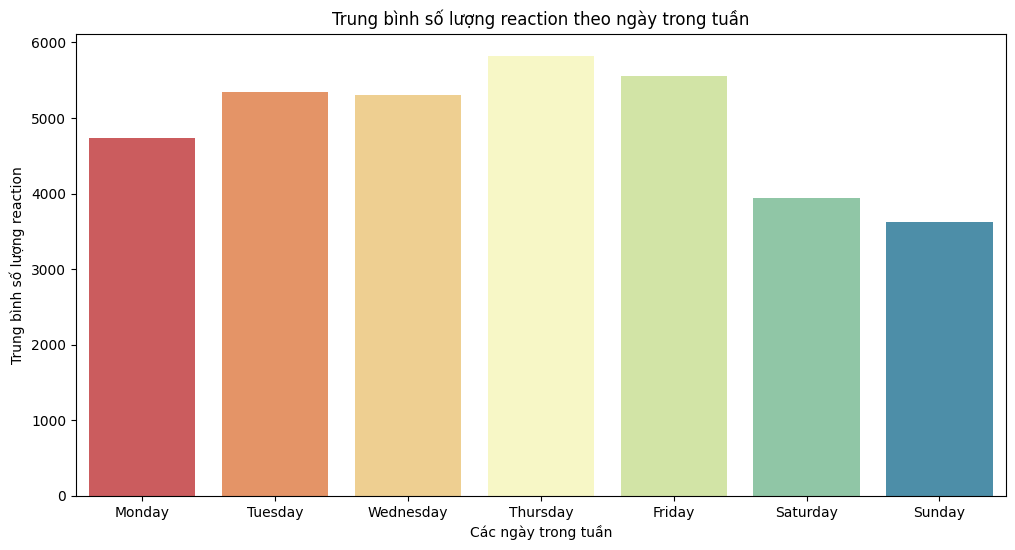

In [19]:
avg_reaction_per_day_of_week = post_df.groupby('weekday')['reaction_count'].mean().sort_index()
avg_reaction_per_day_of_week.rename(index=weekdays, inplace=True)
plt.figure(figsize=(12, 6));
sns.barplot(
    x=avg_reaction_per_day_of_week.index, 
    y=avg_reaction_per_day_of_week.values, 
    hue=avg_reaction_per_day_of_week.index, palette='Spectral', legend=False)
plt.title('Trung bình số lượng reaction theo ngày trong tuần')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Trung bình số lượng reaction');
plt.show()

Trung bình số lượng comment theo ngày trong tuần

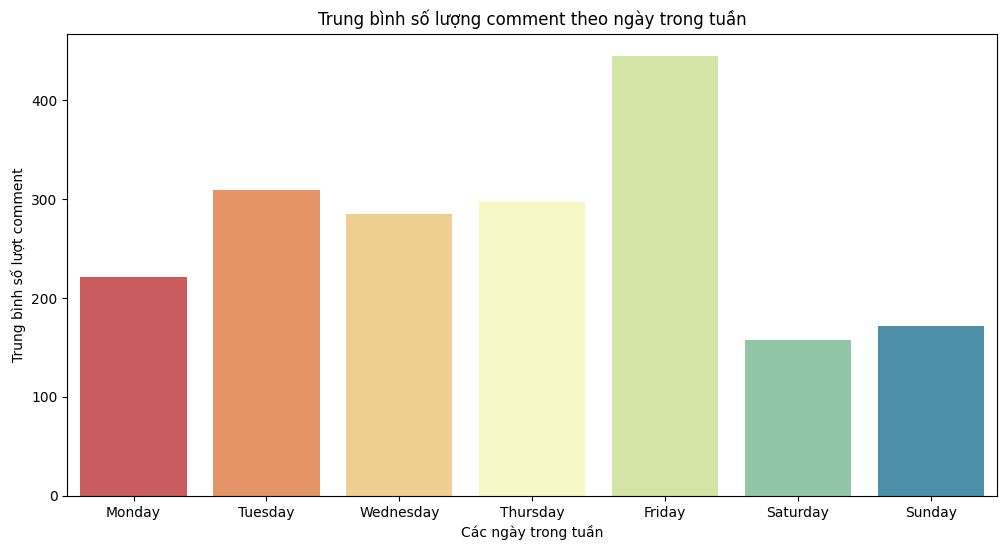

In [20]:
avg_comment_per_day_of_week = post_df.groupby('weekday')['comments'].mean().sort_index()
avg_comment_per_day_of_week.rename(index=weekdays, inplace=True)
plt.figure(figsize=(12, 6));
sns.barplot(
    x=avg_comment_per_day_of_week.index, 
    y=avg_comment_per_day_of_week.values, 
    hue=avg_comment_per_day_of_week.index, palette='Spectral', legend=False);
plt.title('Trung bình số lượng comment theo ngày trong tuần')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Trung bình số lượt comment');

Trung bình số lượng share mỗi ngày trong tuần

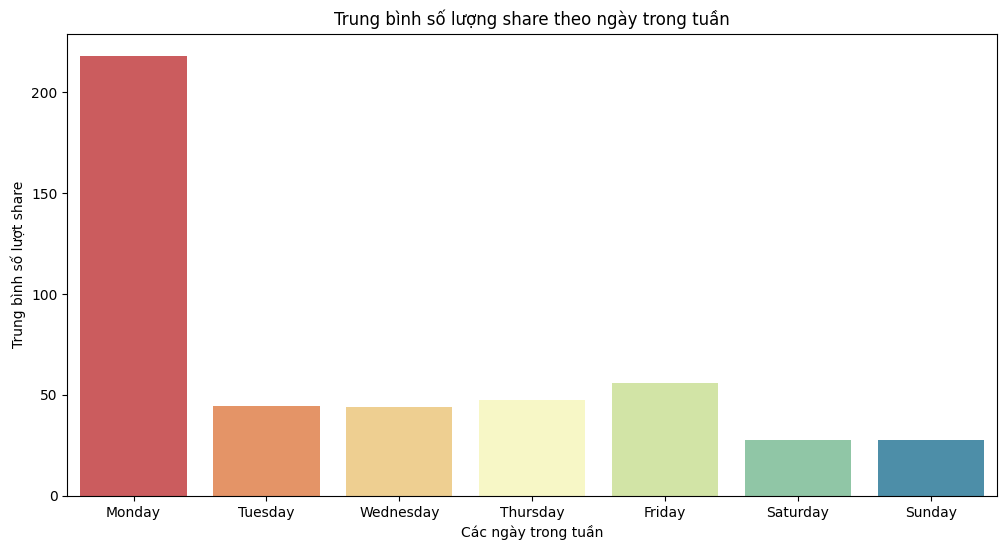

In [21]:
avg_share_per_day_of_week = post_df.groupby('weekday')['shares'].mean().sort_index()
avg_share_per_day_of_week.rename(index=weekdays, inplace=True)
plt.figure(figsize=(12, 6));
sns.barplot(
    x=avg_share_per_day_of_week.index, 
    y=avg_share_per_day_of_week.values, 
    hue=avg_share_per_day_of_week.index, palette='Spectral', legend=False);
plt.title('Trung bình số lượng share theo ngày trong tuần')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Trung bình số lượt share');

### Thống kê bài đăng theo khung giờ đăng bài
Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài. Sự hiệu quả khi đăng bài vào các khung giờ trên

Số lượng bài đăng theo các khung giờ trong 1 ngày

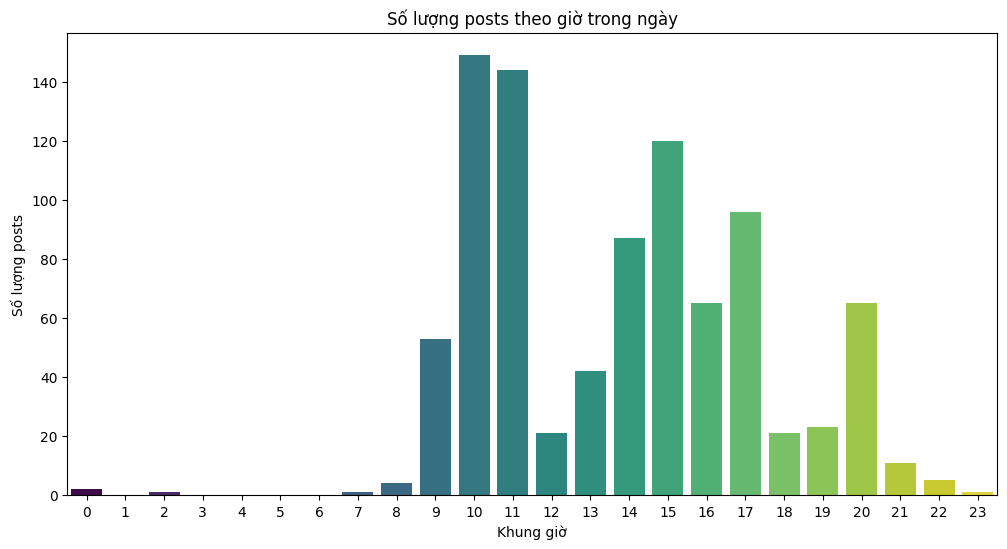

In [22]:
post_df['time'] = post_df['time'] + pd.Timedelta(hours=7)
post_df['hour'] = post_df['time'].dt.hour
posts_per_hour = post_df['hour'].value_counts().sort_index()
all_hours = pd.Index(range(24))
posts_per_hour = posts_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=posts_per_hour.index, y=posts_per_hour.values, hue=posts_per_hour.index, palette='viridis', legend=False)
plt.title('Số lượng posts theo giờ trong ngày')
plt.ylabel('Số lượng posts')
plt.xlabel('Khung giờ');

Trung bình số lượng reaction theo giờ trong ngày

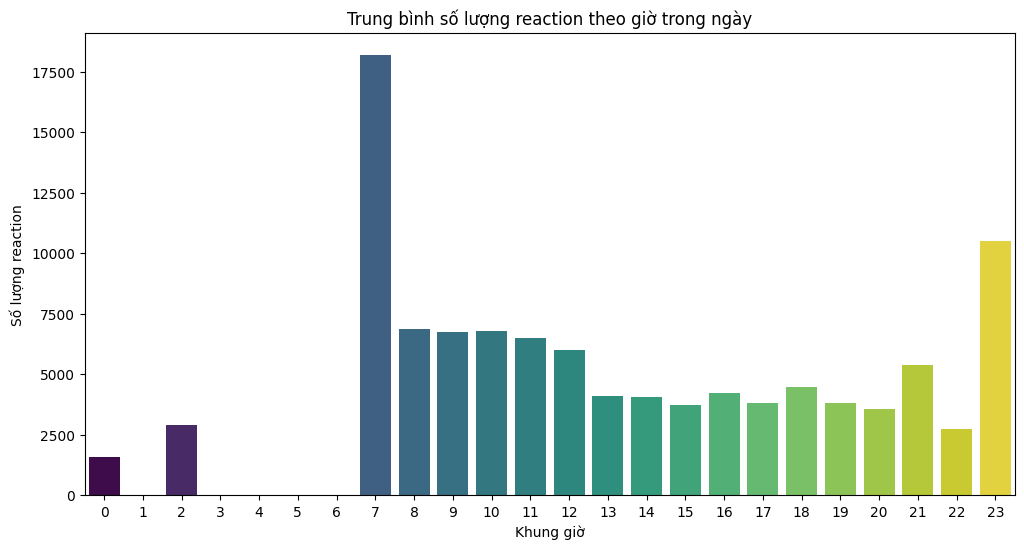

In [23]:
avg_reaction_per_hour = post_df.groupby('hour')['reaction_count'].mean().sort_index()
avg_reaction_per_hour = avg_reaction_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=avg_reaction_per_hour.index, y=avg_reaction_per_hour.values, hue=avg_reaction_per_hour.index, palette='viridis', legend=False)
plt.title('Trung bình số lượng reaction theo giờ trong ngày')
plt.ylabel('Số lượng reaction')
plt.xlabel('Khung giờ');

Trung bình số lượng comment theo giờ trong ngày

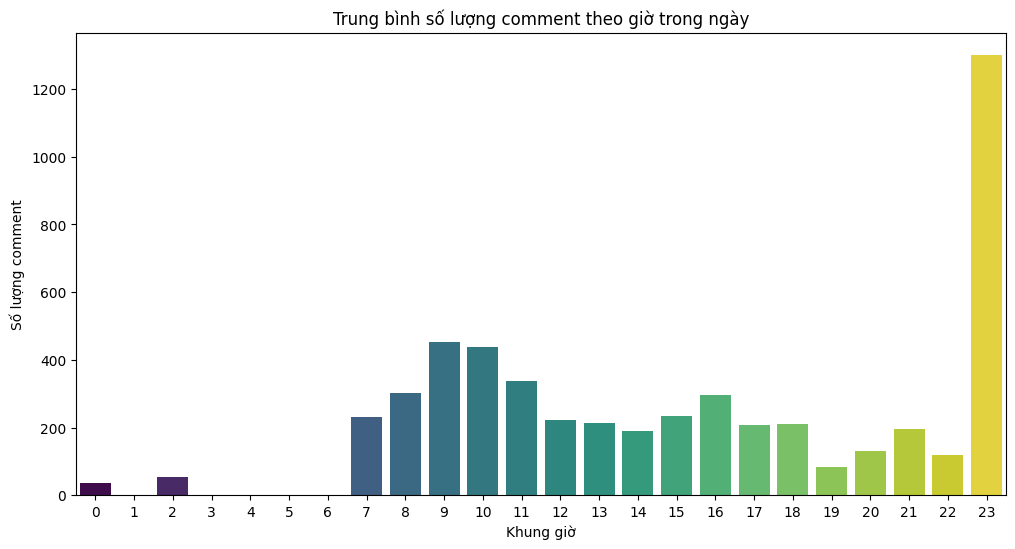

In [24]:
avg_comment_per_hour = post_df.groupby('hour')['comments'].mean().sort_index()
avg_comment_per_hour = avg_comment_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=avg_comment_per_hour.index, y=avg_comment_per_hour.values, hue=avg_comment_per_hour.index, palette='viridis', legend=False)
plt.title('Trung bình số lượng comment theo giờ trong ngày')
plt.ylabel('Số lượng comment')
plt.xlabel('Khung giờ');

Trung bình số lượt share theo giờ trong ngày

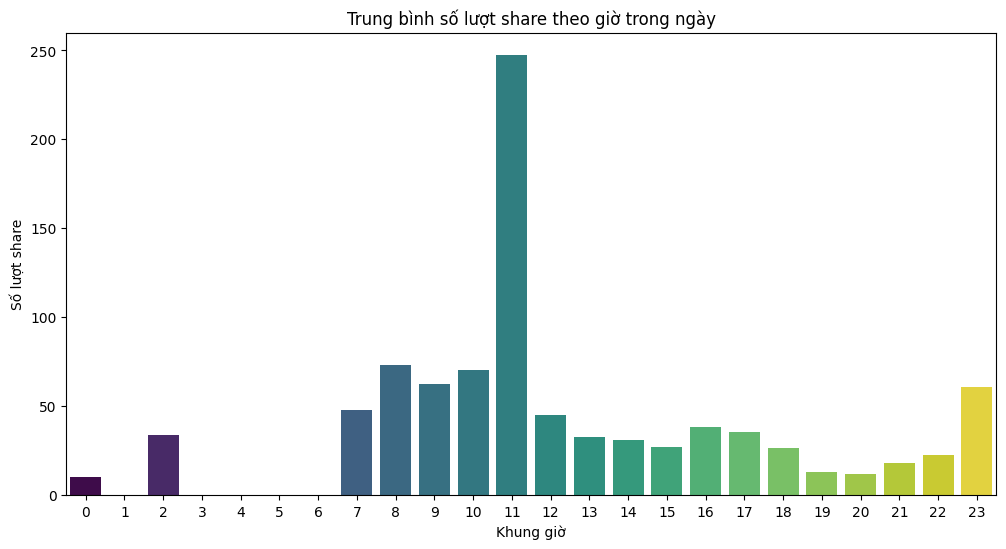

In [25]:
avg_share_per_hour = post_df.groupby('hour')['shares'].mean().sort_index()
avg_share_per_hour = avg_share_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=avg_share_per_hour.index, y=avg_share_per_hour.values, hue=avg_share_per_hour.index, palette='viridis', legend=False)
plt.title('Trung bình số lượt share theo giờ trong ngày')
plt.ylabel('Số lượt share')
plt.xlabel('Khung giờ');

### Sự thay đổi của số lượt reactions theo thời gian

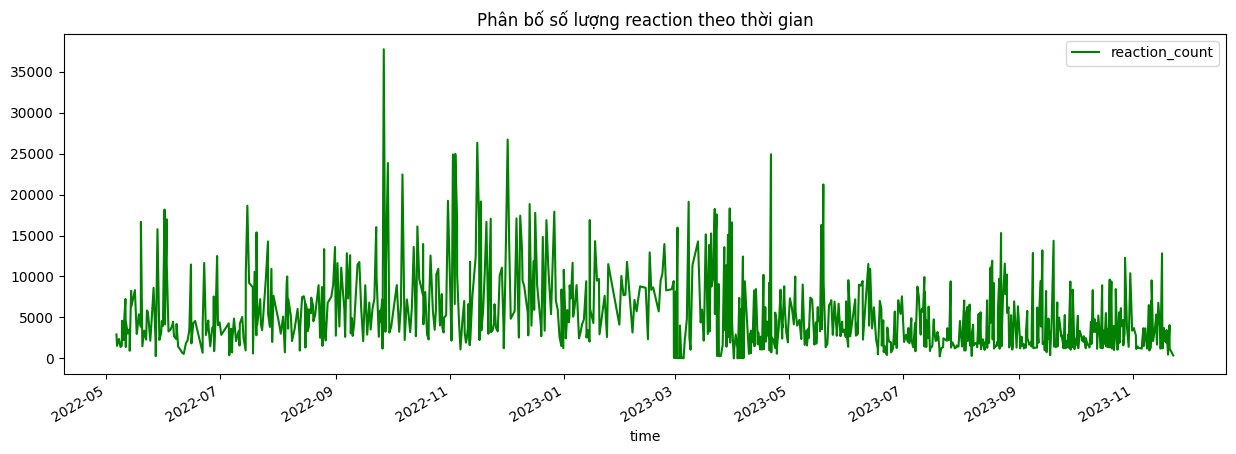

In [26]:
post_df.plot(x='time', y='reaction_count', figsize=(15, 5), title='Phân bố số lượng reaction theo thời gian', color='green');

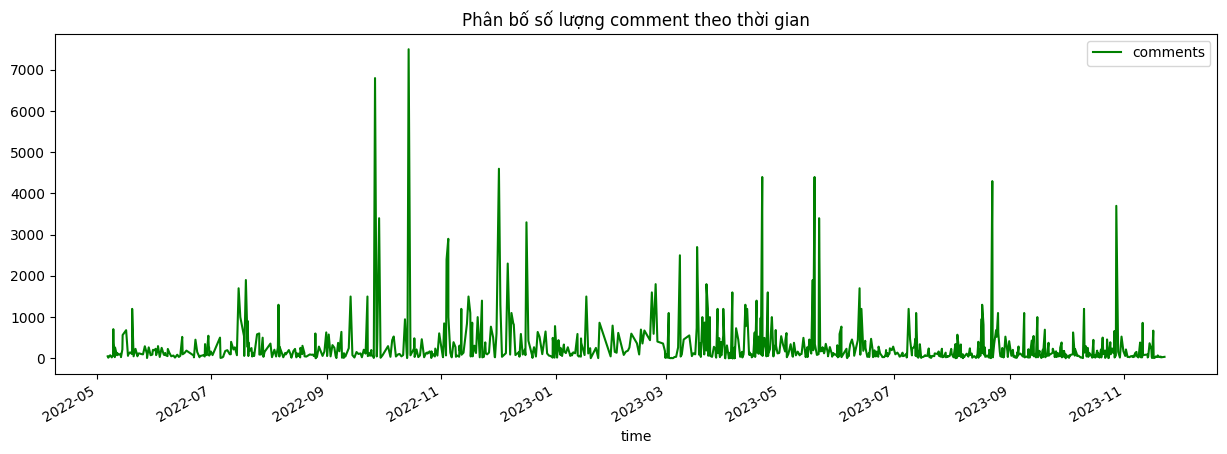

In [27]:
post_df.plot(x='time', y='comments', figsize=(15, 5), title='Phân bố số lượng comment theo thời gian', color='green');

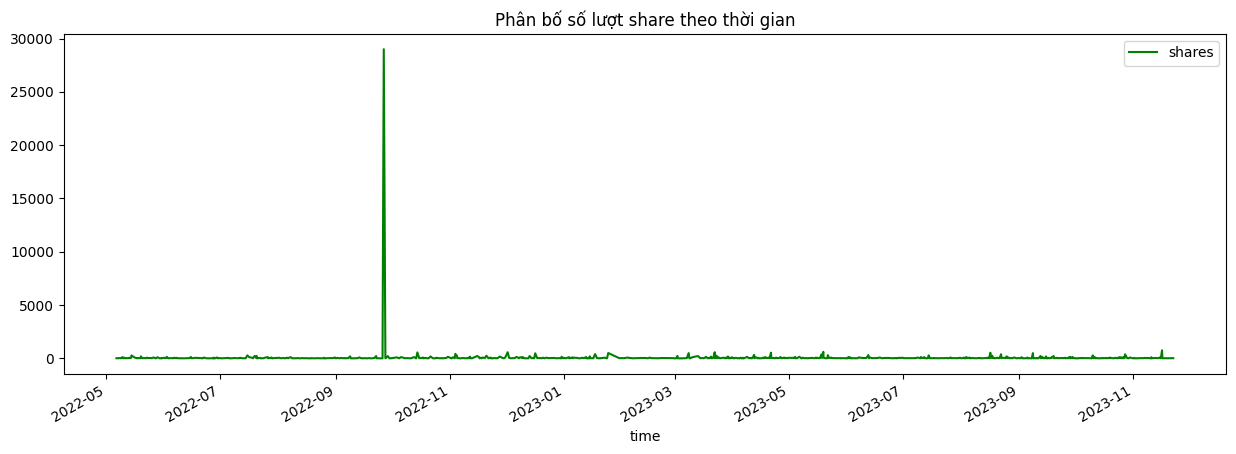

In [28]:
post_df.plot(x='time', y='shares', figsize=(15, 5), title='Phân bố số lượt share theo thời gian', color='green');

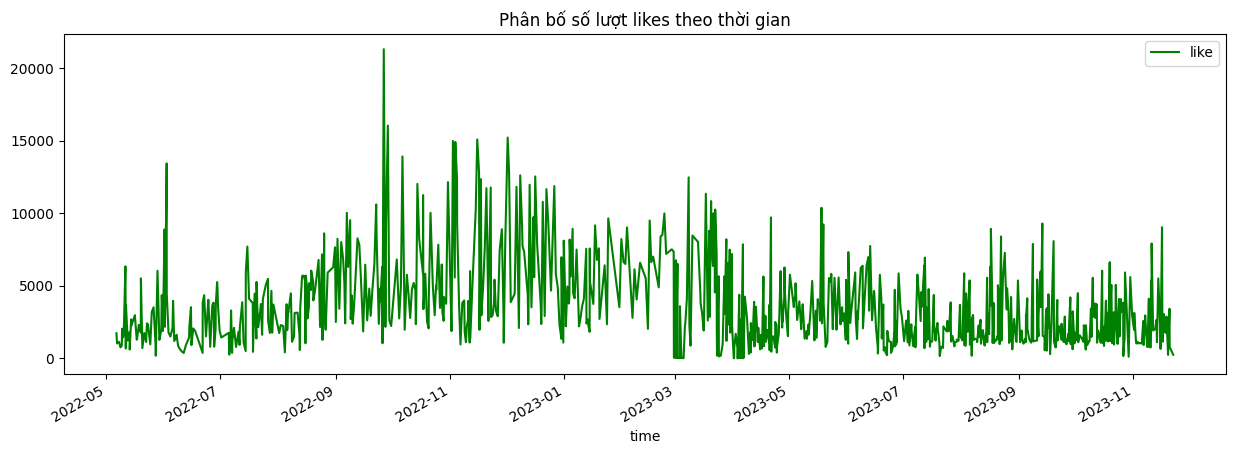

In [29]:
post_df.plot(x='time', y='like', figsize=(15, 5), title='Phân bố số lượt likes theo thời gian', color='green');

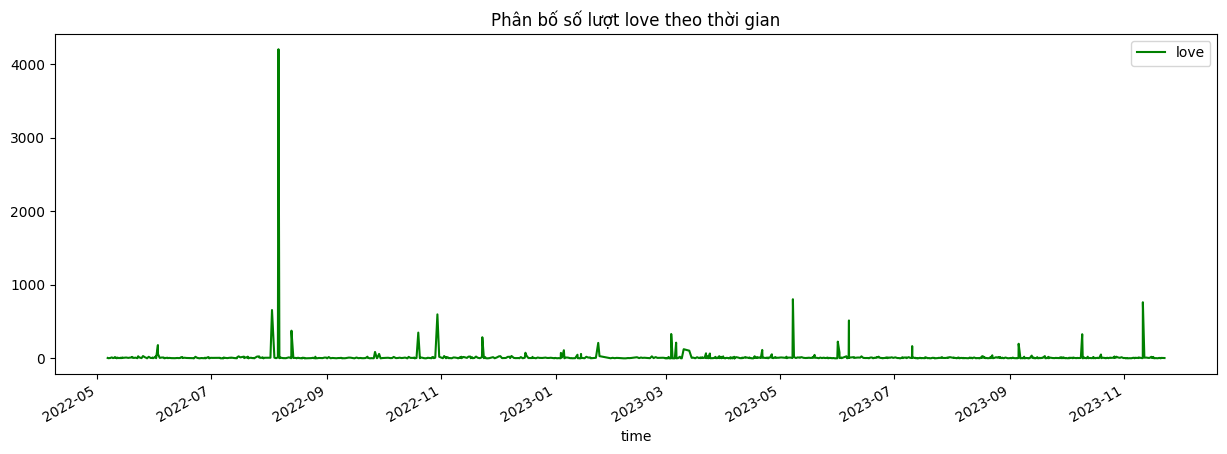

In [30]:
post_df.plot(x='time', y='love', figsize=(15, 5), title='Phân bố số lượt love theo thời gian', color='green');

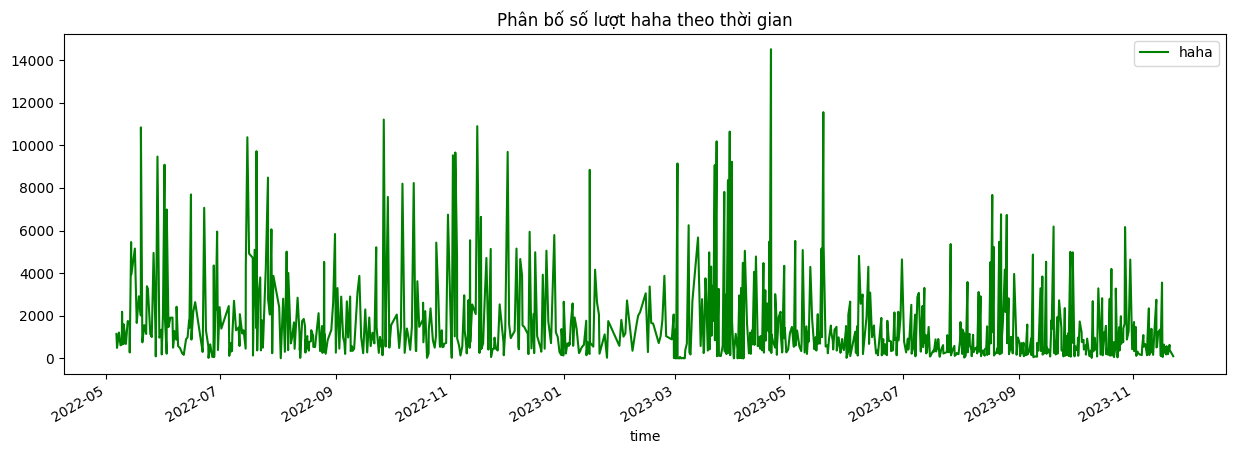

In [31]:
post_df.plot(x='time', y='haha', figsize=(15, 5), title='Phân bố số lượt haha theo thời gian', color='green');

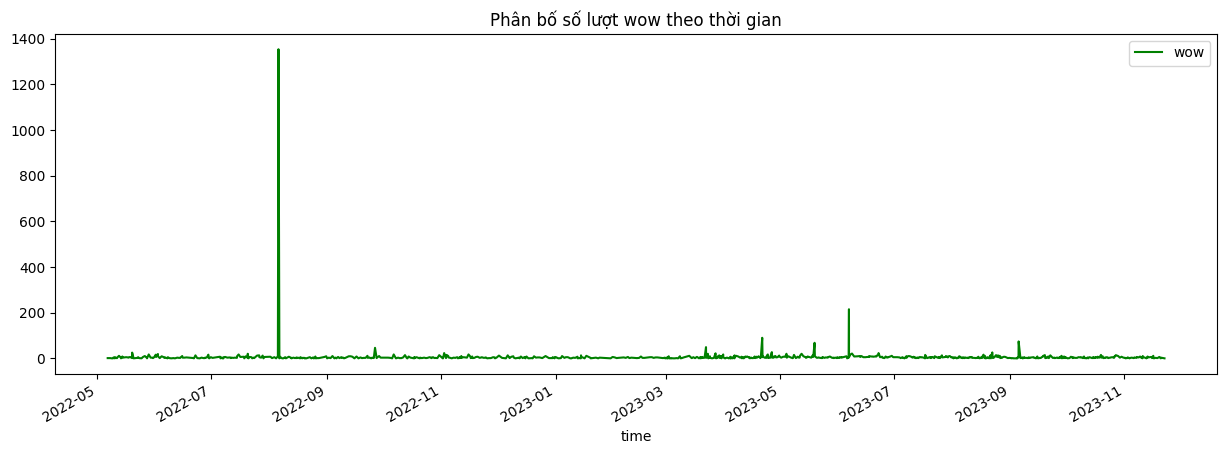

In [32]:
post_df.plot(x='time', y='wow', figsize=(15, 5), title='Phân bố số lượt wow theo thời gian', color='green');

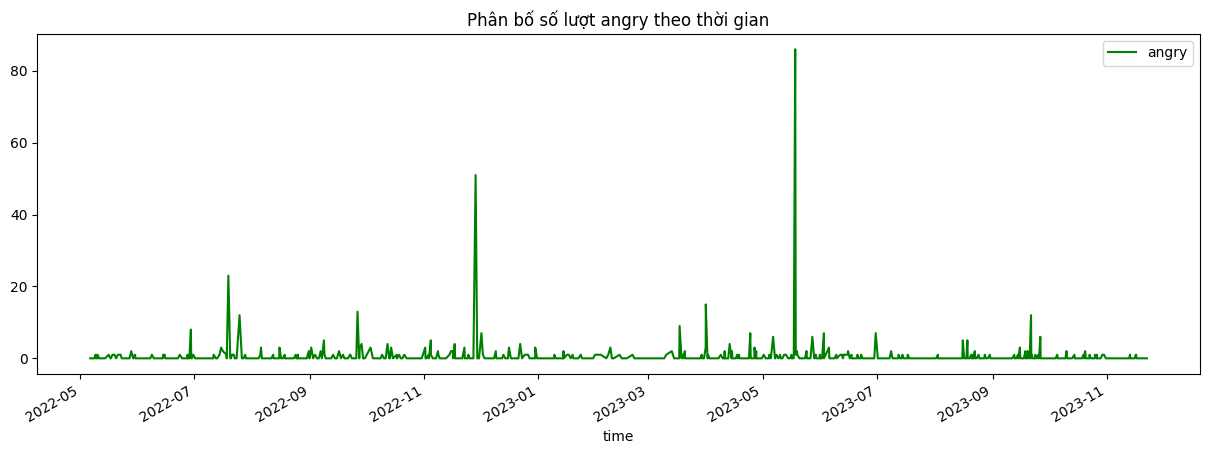

In [33]:
post_df.plot(x='time', y='angry', figsize=(15, 5), title='Phân bố số lượt angry theo thời gian', color='green');

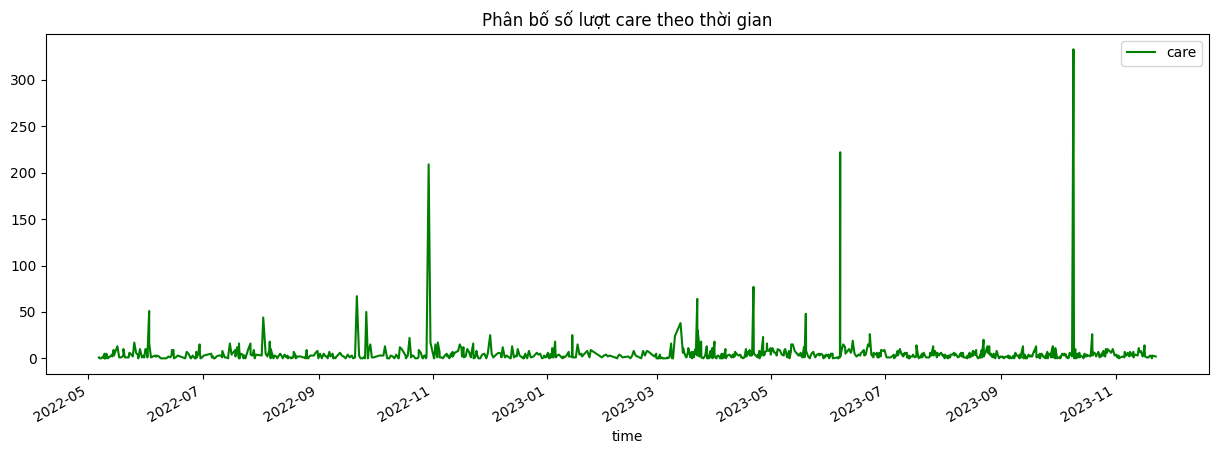

In [34]:
post_df.plot(x='time', y='care', figsize=(15, 5), title='Phân bố số lượt care theo thời gian', color='green');

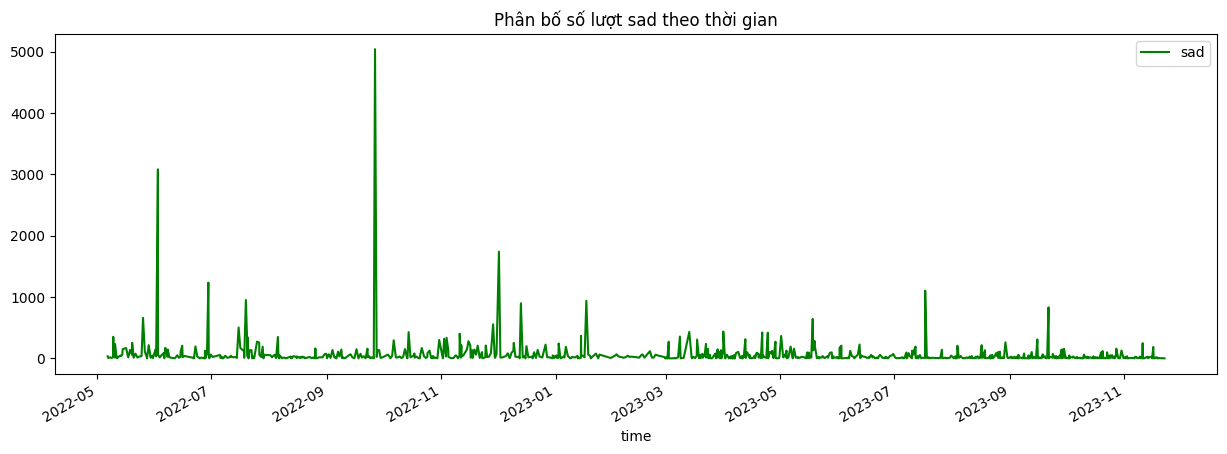

In [35]:
post_df.plot(x='time', y='sad', figsize=(15, 5), title='Phân bố số lượt sad theo thời gian', color='green');

### Sự tương quan giữa số lượng reactions với các trường khác như số lượng bình luận, độ dài bài viết, số lượt share, comment

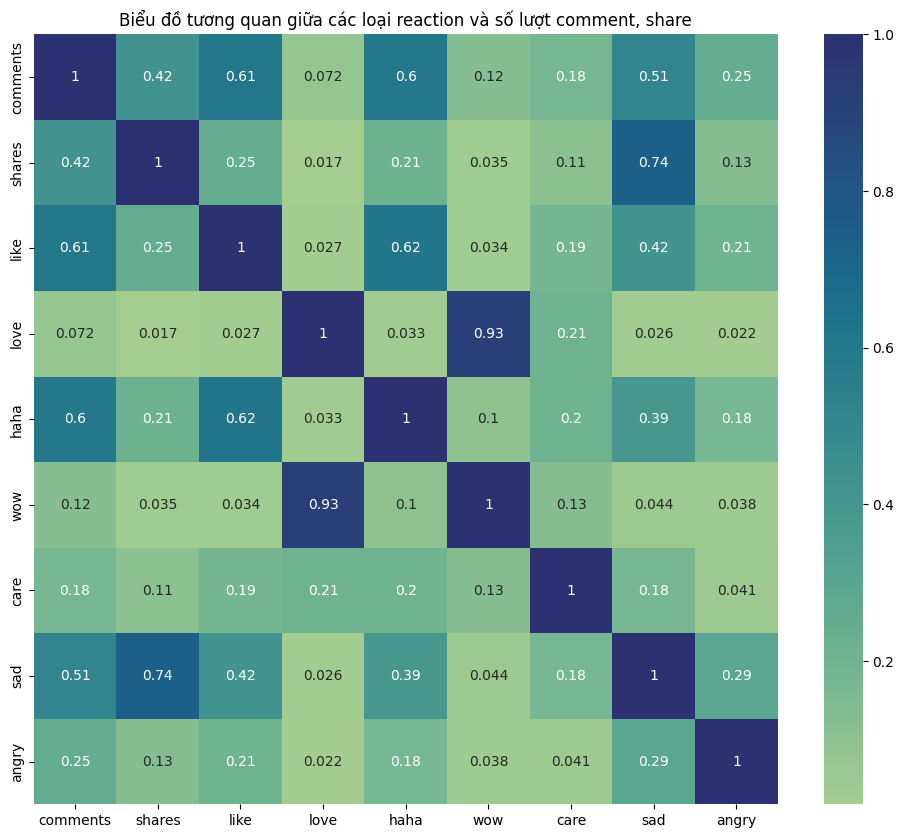

In [36]:
corr_matrix = post_df[['comments', 'shares', 'like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']].corr()
plt.figure(figsize=(12, 10));
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title('Biểu đồ tương quan giữa các loại reaction và số lượt comment, share');

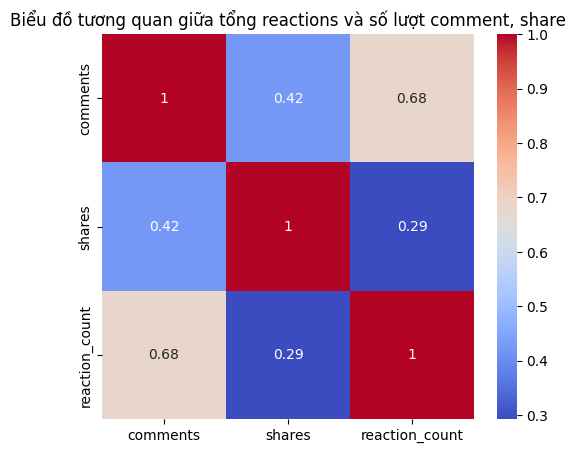

In [37]:
corr_matrix = post_df[['comments', 'shares', 'reaction_count']].corr()
plt.figure(figsize=(6, 5));
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Biểu đồ tương quan giữa tổng reactions và số lượt comment, share');

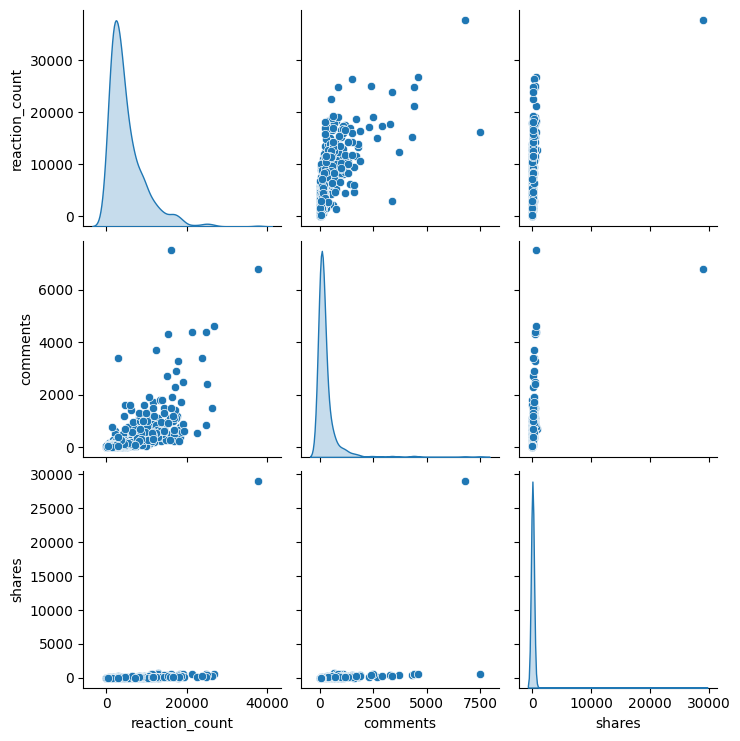

In [38]:
sns.pairplot(post_df[['reaction_count', 'comments', 'shares']], diag_kind='kde');

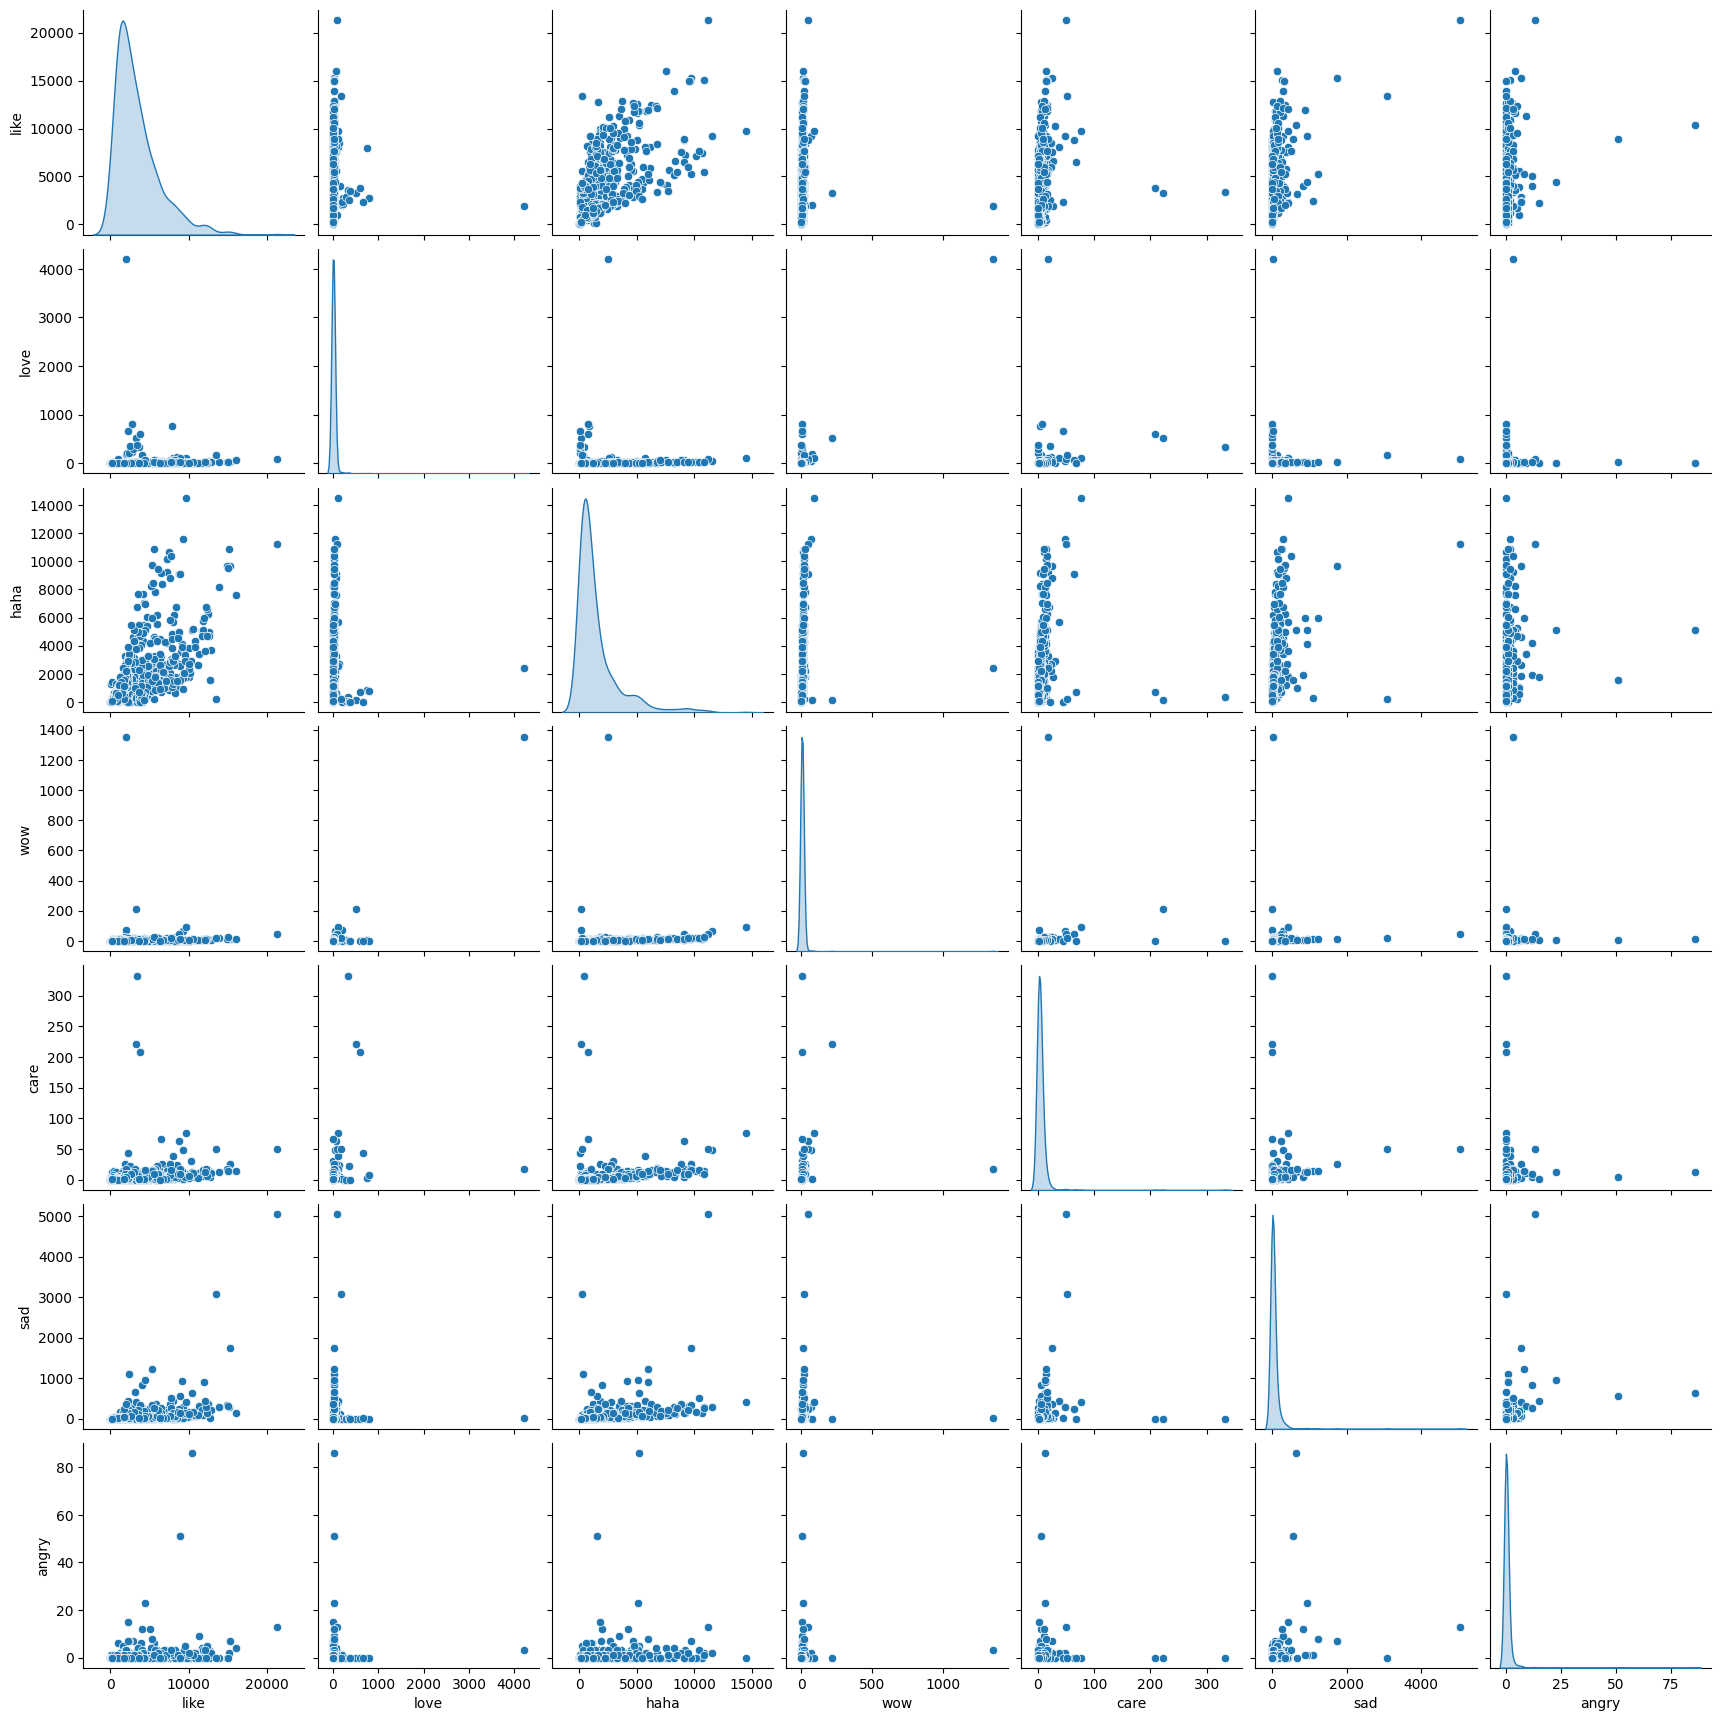

In [39]:
sns.pairplot(post_df[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']], diag_kind='kde');

### Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được thu thập?

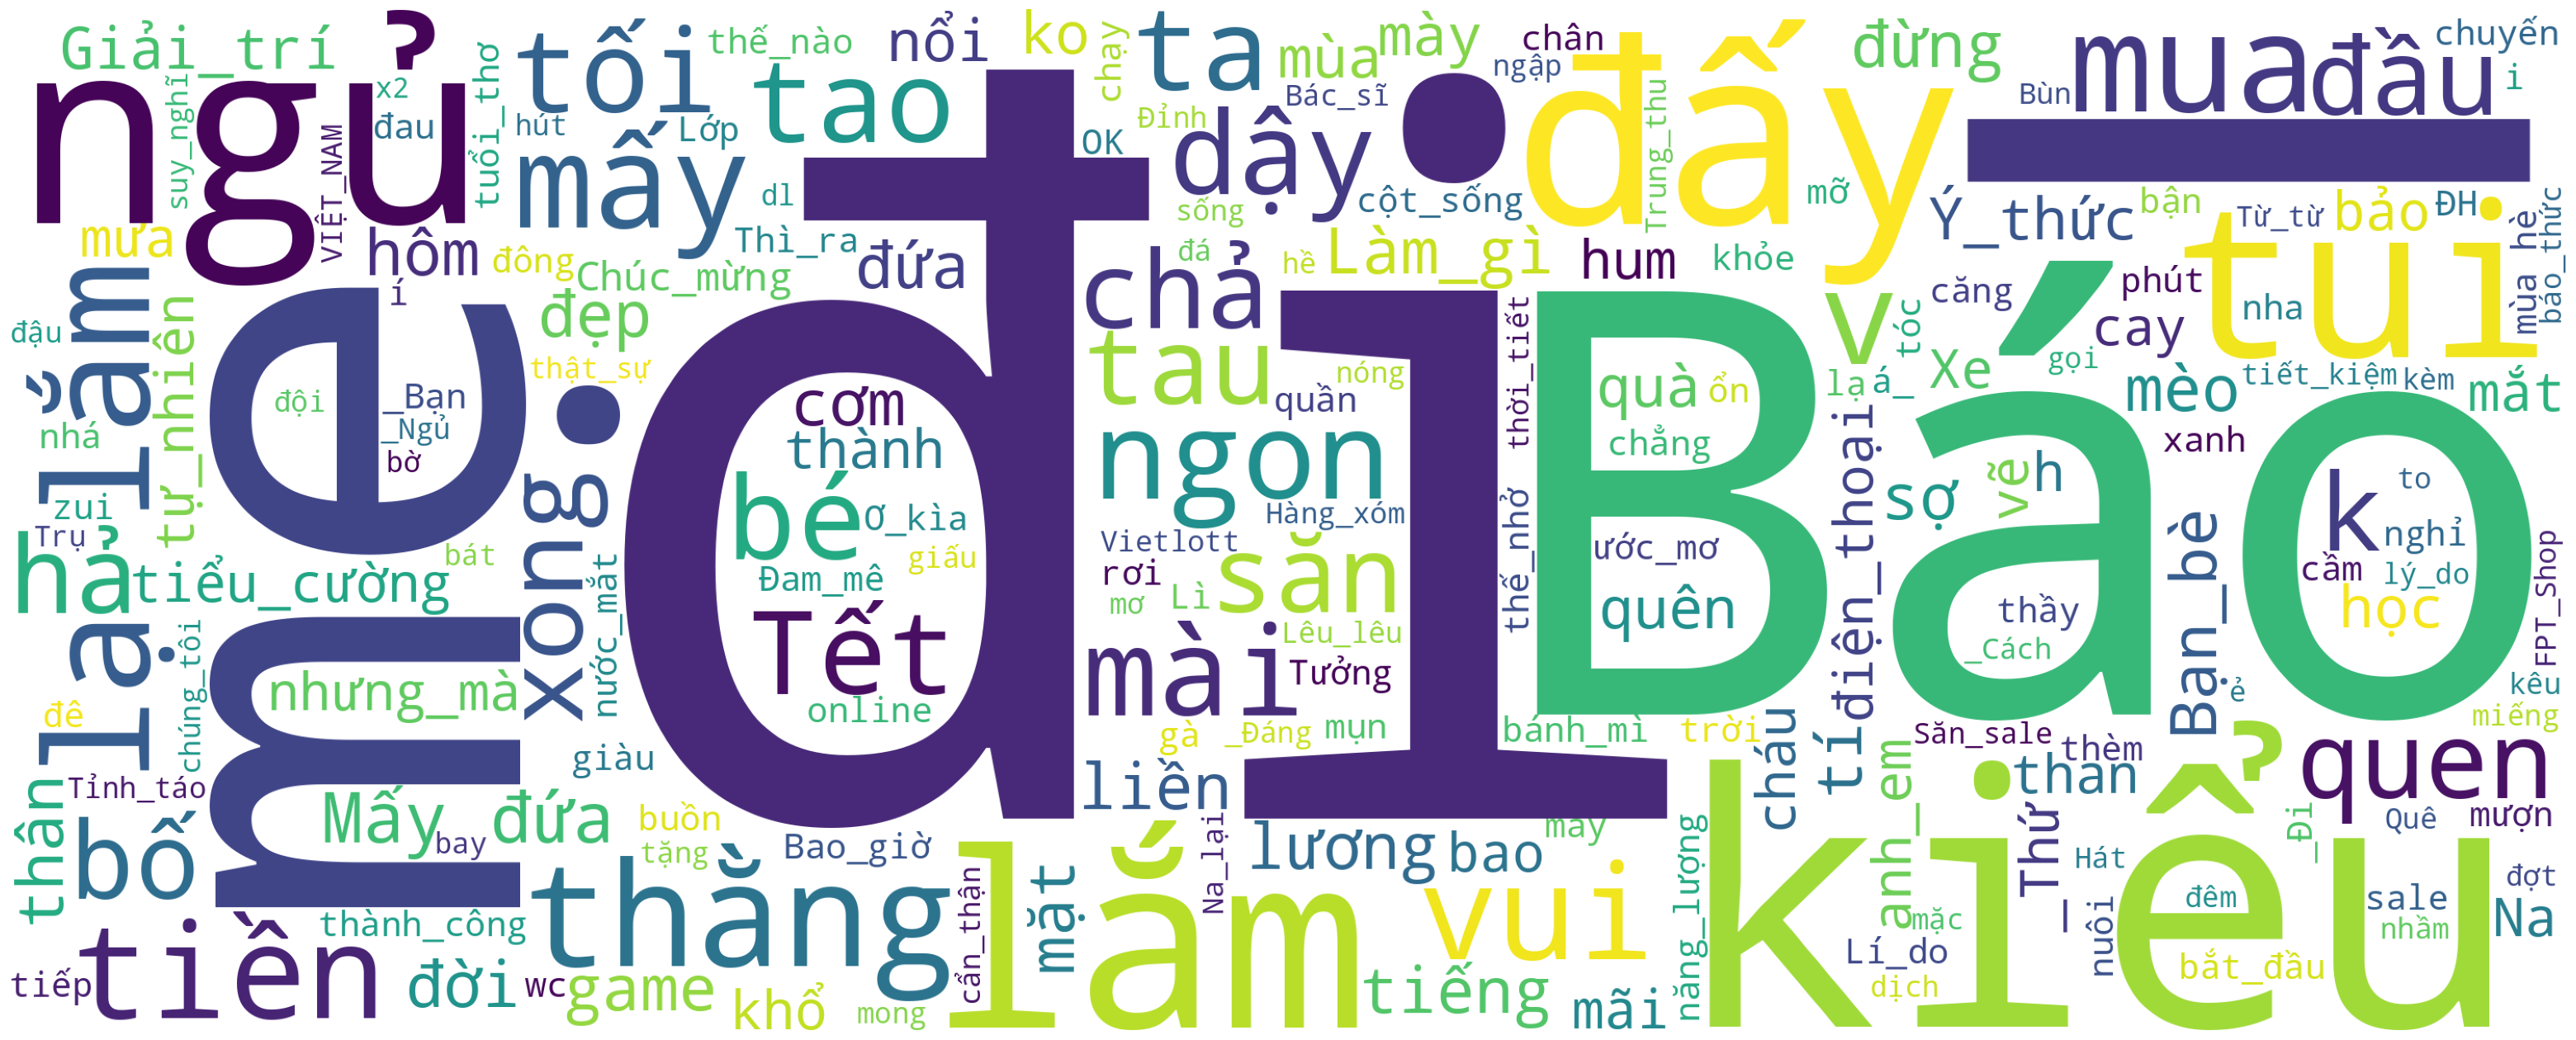

In [40]:
from wordcloud import WordCloud
from underthesea import word_tokenize, classify

# Danh sách các stopwords Tiếng Việt
stopwords = set(open('data/other/vietnamese-stopwords.txt', mode='r', encoding='utf-8').read().splitlines())

# Tokenize text
post_text = ' '.join(post_df['post_text'])
post_text = word_tokenize(post_text, format='text')

wordcloud = WordCloud(
    stopwords=stopwords, 
    background_color='white', 
    width=3000, 
    height=1200).generate(post_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Thống kê các hashtag phổ biến mà page dùng

In [41]:
hashtags = post_df['hashtags'].str.findall(r'#\w+')
hashtags = [tag.lower() for sublist in hashtags for tag in sublist]
hashtag_counts = pd.Series(hashtags).value_counts()
hashtag_counts.head(10)

#panda            449
#muonggg          164
#bhttd             61
#rou               44
#lìquầnxòi         28
#vuilavietlott     17
#tiger             14
#hoho              11
#vietlott           3
#lazada             3
Name: count, dtype: int64

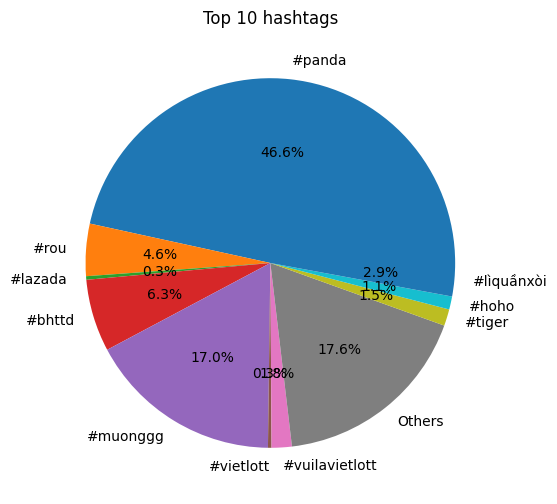

In [48]:
top_10_hashtags_df = hashtag_counts.head(10)
top_10_hashtags_df['Others'] = hashtag_counts.sum() - top_10_hashtags_df.sum()

index_array = [0, 3, 9, 2, 1, 8, 5, 10, 6, 7, 4]
top_10_hashtags_df.iloc[index_array].plot(kind='pie', figsize=(6, 6), title='Top 10 hashtags', autopct='%1.1f%%');
plt.ylabel('');

In [43]:
top_10_hashtags = top_10_hashtags_df.index[:10].tolist()
hashtags_avg_df = pd.DataFrame(index=top_10_hashtags)
hashtags_avg_df['Count'] = top_10_hashtags_df[:10].values

avg_reaction_count = []
avg_comments = []
avg_shares = []

for hashtag in top_10_hashtags:
    filtered_df = post_df[post_df['hashtags'].apply(lambda x: hashtag in x.lower())]
    avg_reaction_count.append(filtered_df['reaction_count'].mean())
    avg_comments.append(filtered_df['comments'].mean())
    avg_shares.append(filtered_df['shares'].mean())

hashtags_avg_df['Avg Reaction Count'] = avg_reaction_count
hashtags_avg_df['Avg Comments'] = avg_comments
hashtags_avg_df['Avg Shares'] = avg_shares

hashtags_avg_df

,Count,Avg Reaction Count,Avg Comments,Avg Shares
#panda,449,6756.198218,410.144766,125.227171
#muonggg,164,2793.884146,203.030488,27.920732
#bhttd,61,2858.508197,128.754098,21.180328
#rou,44,5678.454545,226.818182,23.795455
#lìquầnxòi,28,3299.928571,136.357143,32.250000
#vuilavietlott,17,3794.176471,38.823529,13.117647
#tiger,14,8026.785714,191.000000,27.714286
#hoho,11,2419.181818,125.454545,22.000000
#vietlott,3,4969.000000,114.000000,10.000000
#lazada,3,3206.800000,50.400000,6.200000


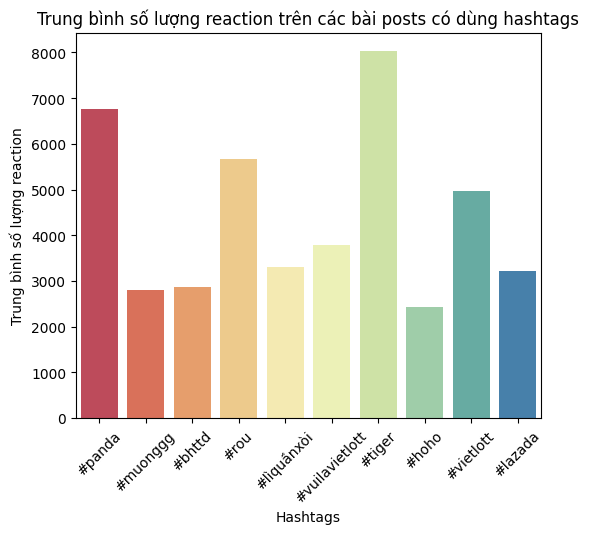

In [44]:
plt.figure(figsize=(6, 5))
sns.barplot(x=hashtags_avg_df.index, y=hashtags_avg_df['Avg Reaction Count'], hue=hashtags_avg_df.index, palette='Spectral', legend=False);
plt.xticks(rotation=45);
plt.xlabel('Hashtags');
plt.title('Trung bình số lượng reaction trên các bài posts có dùng hashtags');
plt.ylabel('Trung bình số lượng reaction');

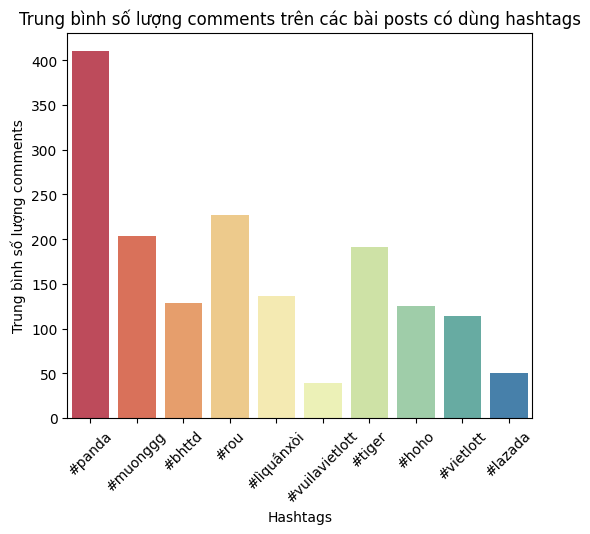

In [45]:
plt.figure(figsize=(6, 5))
sns.barplot(x=hashtags_avg_df.index, y=hashtags_avg_df['Avg Comments'], hue=hashtags_avg_df.index, palette='Spectral', legend=False);
plt.xticks(rotation=45);
plt.xlabel('Hashtags');
plt.title('Trung bình số lượng comments trên các bài posts có dùng hashtags');
plt.ylabel('Trung bình số lượng comments');

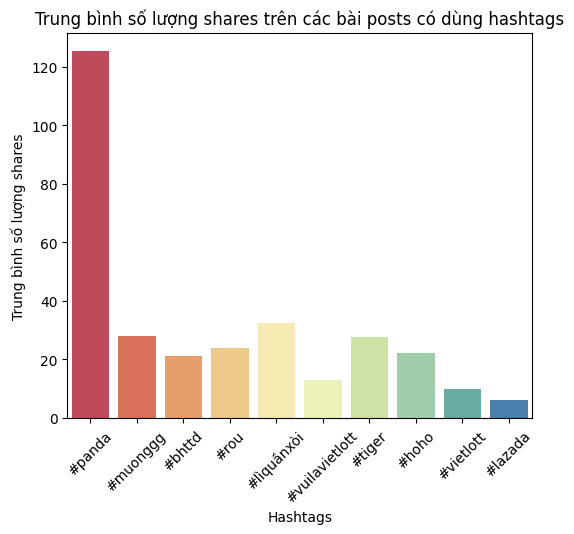

In [46]:
plt.figure(figsize=(6, 5))
sns.barplot(x=hashtags_avg_df.index, y=hashtags_avg_df['Avg Shares'], hue=hashtags_avg_df.index, palette='Spectral', legend=False);
plt.xticks(rotation=45);
plt.xlabel('Hashtags');
plt.title('Trung bình số lượng shares trên các bài posts có dùng hashtags');
plt.ylabel('Trung bình số lượng shares');